In [1]:
# Import libraries
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd

In [13]:
# Import as Dataframe
df = pd.read_csv('./Data/dataset_mood_smartphone.csv')
df.head()

# Drop unnecessary columns
data =  df.drop(['Unnamed: 0'], axis=1)
    
# Make sure the 'time' column is of type datetime
data['time'] = pd.to_datetime(data['time'])

In [3]:
from Preprocessing.datacleaning import remove_incorrect_values, convert_to_wide, DetectAnomalies

In [5]:
# Remove incorrect values
valid_df, removed_df = remove_incorrect_values(data)

# Call the function and store the result in a new dataframe
new_df = convert_to_wide(valid_df)

activity: 1 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188]}
appCat.builtin: 2 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759]}
appCat.communication: 3 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015]}
appCat.entertainment: 4 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015], 'appCat.entertainment': [393, 397, 640, 1313, 1616]}
appCat.finance: 5 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015], 'appCat.entertainment': [393, 397, 640, 1313, 1616], 'appCat.finance': [172, 528]}
appCat.game: 6 anomalies, Indexes: {'activity': [133, 1156, 1159, 1

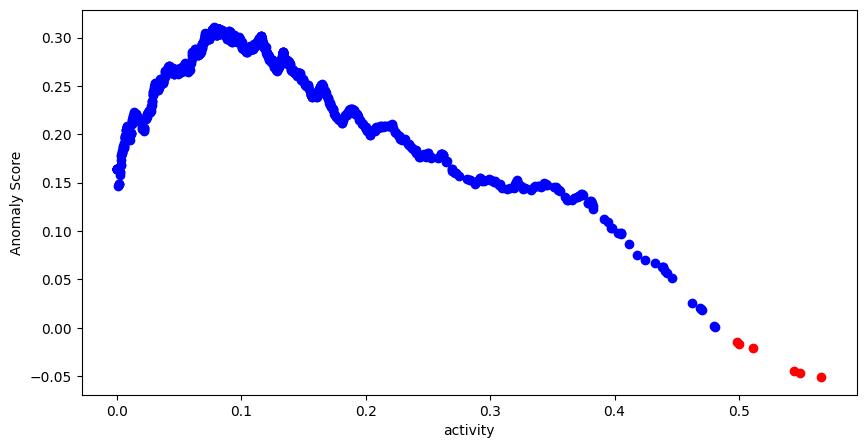

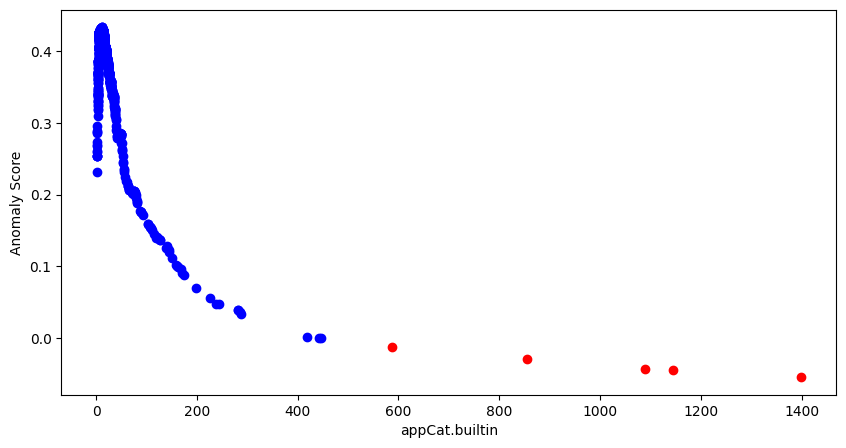

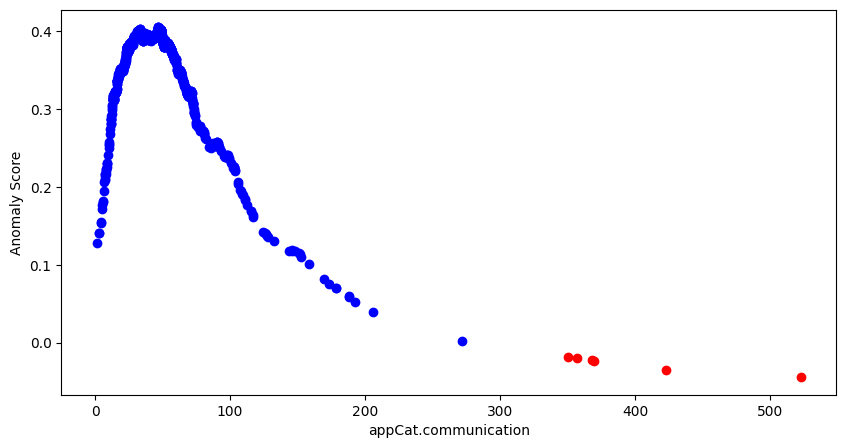

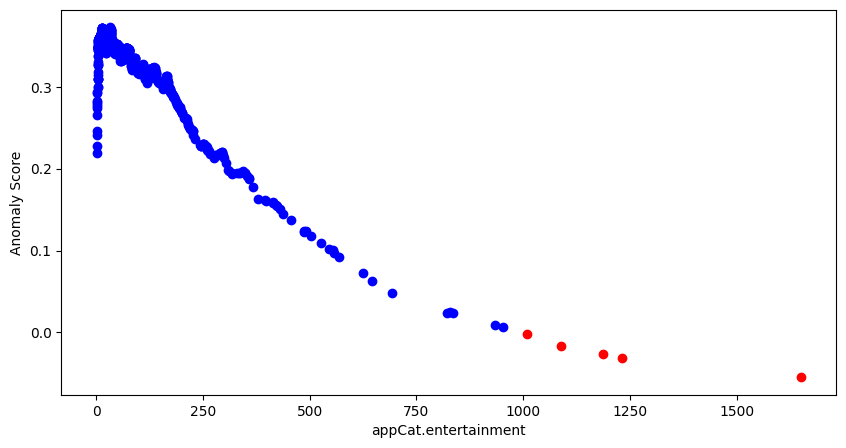

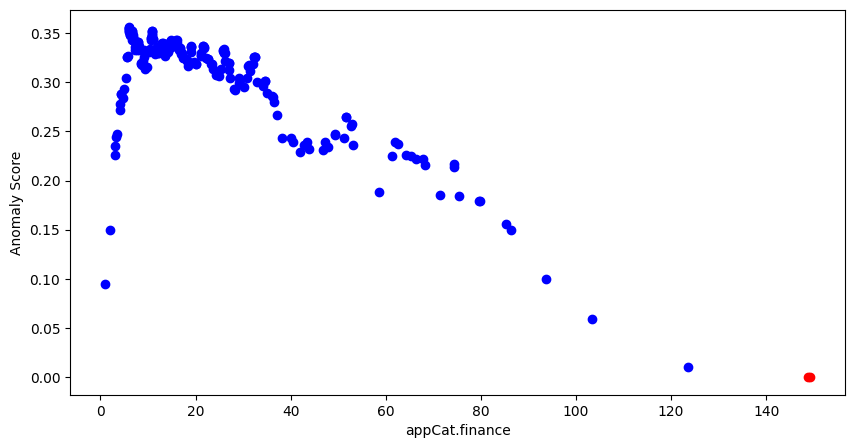

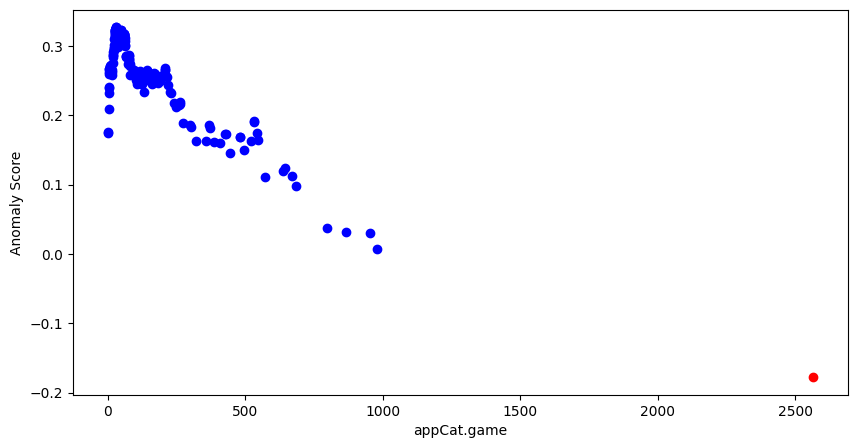

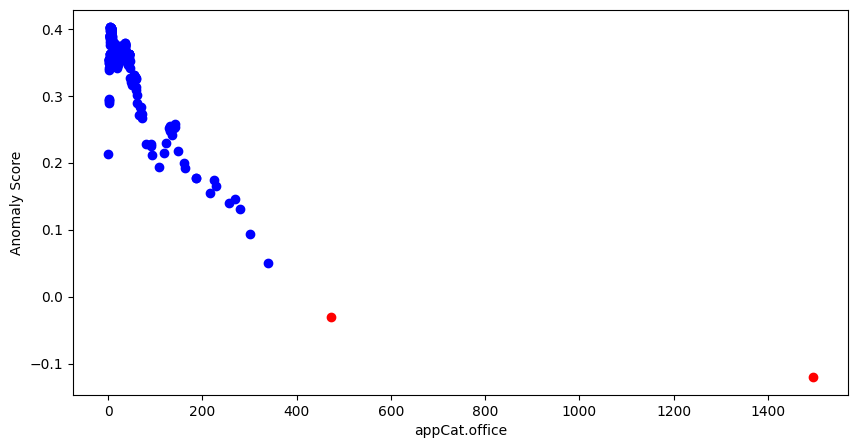

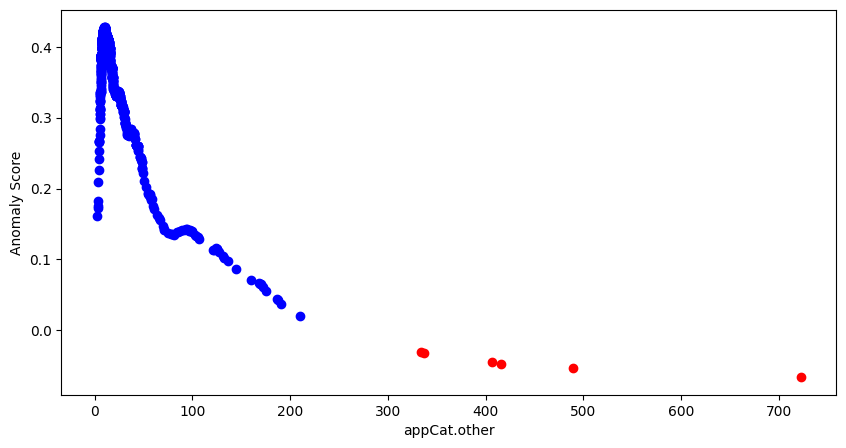

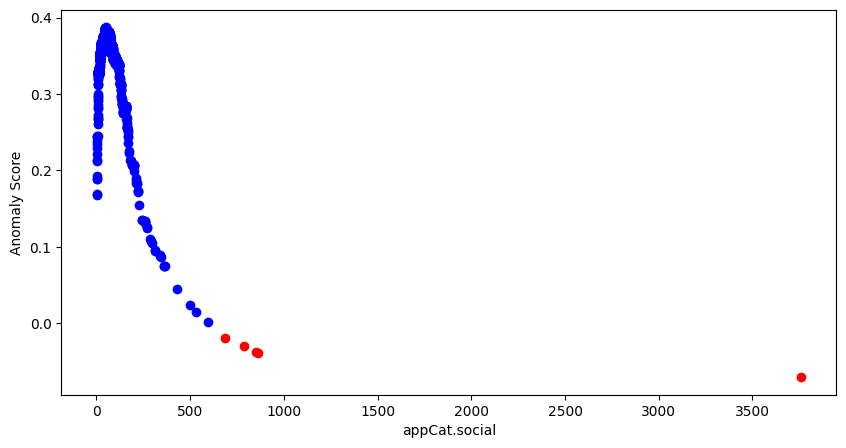

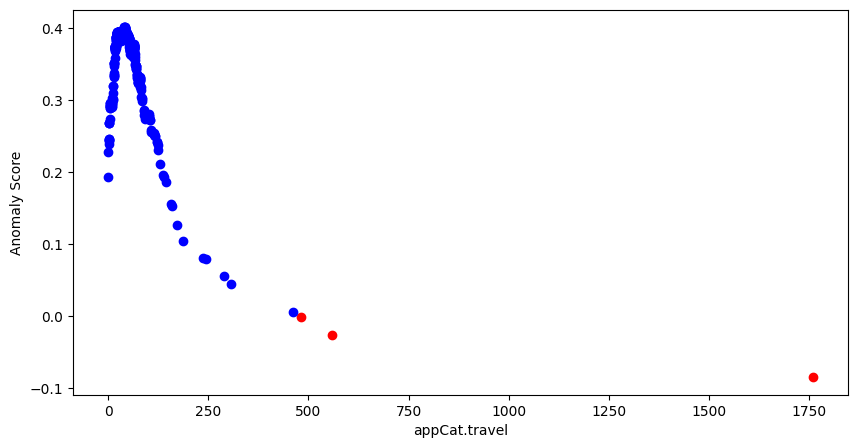

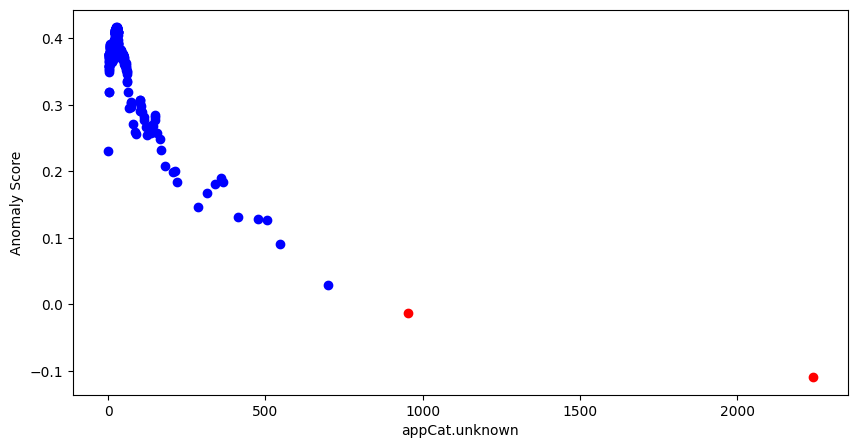

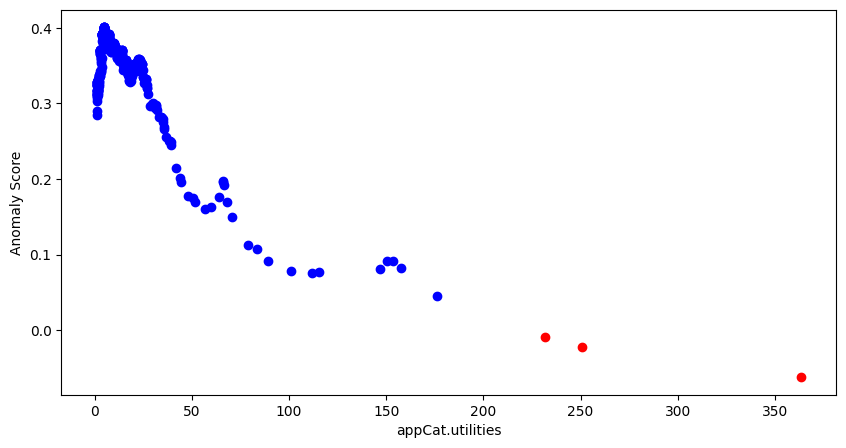

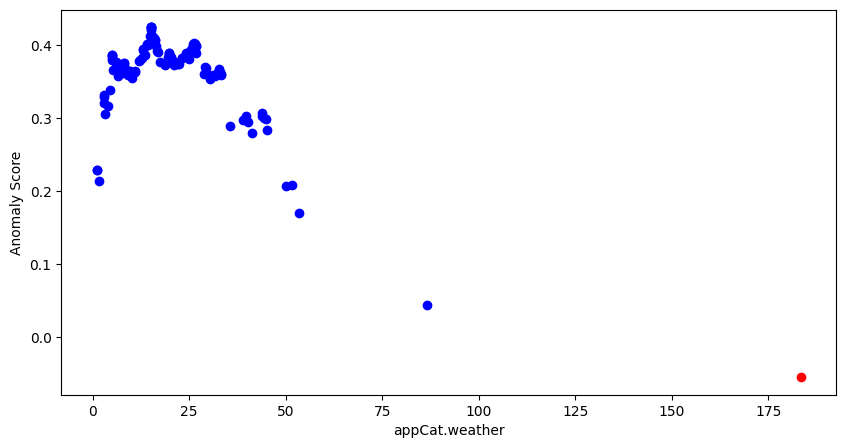

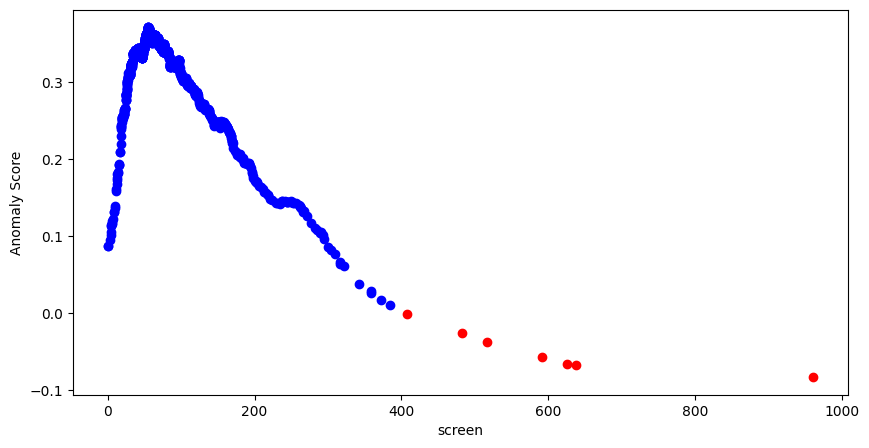

In [6]:
# Create an instance of the DetectAnomalies class
anomaly_detector = DetectAnomalies(contamination=0.005)

# Create a list of columns to be analyzed
columns = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'screen']
    
# Call the detect_anomalies method to identify anomalies in the data
anomaly_df, clean_data, anomaly_dict = anomaly_detector.detect_anomalies(new_df, columns)

# Plot the anomalies and non-anomalies for each column
anomaly_detector.plot()

In [12]:
# Remove the index title from the dataframe
clean_data.index.name = None

# Remove the missing values from the target variable
clean_data = clean_data.dropna(subset=['mood']).reset_index(drop=True)

# Check the number of missing values in the imputed data
clean_data.isnull().sum()

# # Remove the index title from the dataframe
# clean_data.index.name = None
# anomaly_df # 53 rows × 21 columns

# # Get the unique rows from the dataframe 

# # Count the unique id's in the dataframe
# len(anomaly_df['id'].unique()) # 22
# len(anomaly_df['date'].unique()) # 34

# # Calculate the percentage of missing values for each variable
# clean_data.isnull().sum()/len(clean_data) * 100

# # Check how many missing values are in the mood variable
# clean_data['mood'].isnull().sum() # 703

# # Remove the missing values from the target variable
# clean_data = clean_data.dropna(subset=['mood']).reset_index(drop=True)

# # Change the 'mood' float column to an integer column
# clean_data['mood'] = clean_data['mood'].astype(int)

# # Count the number of values in the 'mood' column
# print(clean_data['mood'].value_counts())

# # Check the number of missing values in the imputed data
# clean_data.isnull().sum()


mood
7    627
6    402
8    114
5     57
3      7
4      6
9      4
Name: count, dtype: int64


variable
id                         0
date                       0
activity                 116
appCat.builtin           111
appCat.communication     121
appCat.entertainment     426
appCat.finance          1018
appCat.game             1035
appCat.office            961
appCat.other             162
appCat.social            291
appCat.travel            814
appCat.unknown           976
appCat.utilities         811
appCat.weather          1109
call                     509
circumplex.arousal         0
circumplex.valence         2
mood                       0
screen                   100
sms                      806
dtype: int64

In [11]:

# save the DataFrame to a CSV file with a specified path
clean_data.to_csv('/Users/larascipio/Documents/Studie/datamijnen/Data/clean_data.csv', index=False)

In [8]:
from Preprocessing.datacleaning import impute_with0, ImputeKNN, ImputeIterative

In [9]:
from sklearn.model_selection import TimeSeriesSplit

# Create an instance of TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits = 5) #

for train_index, test_index in tscv.split(clean_data):
    train_data = clean_data.iloc[train_index]
    test_data = clean_data.iloc[test_index]


print(train_data.shape) # (1015, 21)
print(test_data.shape) # (202, 21)

(1015, 21)
(202, 21)


In [ ]:
# Define the columns to impute
cols_to_impute = [col for col in train_data.columns if col not in ['id', 'date', 'mood']]

# Impute missing values with 0 for train and test data
zero_train = impute_with0(train_data, cols_to_impute)
zero_test = impute_with0(test_data, cols_to_impute)

In [ ]:
# Create an instance of the Iterative Imputataion class
KNNimputer_train = ImputeKNN(train_data, cols_to_impute)
KNNimputer_test = ImputeKNN(test_data, cols_to_impute)

# Impute missing values and join the imputed data to the original DataFrame
KNN_train = KNNimputer_train.impute()
KNN_test = KNNimputer_test.impute()

# Join with original data
KNN_train_df = KNNimputer_train.join2full(train_data)
KNN_test_df = KNNimputer_test.join2full(test_data)

In [ ]:
# Create an instance of the Iterative Imputataion class
ITimputer_train = ImputeIterative(train_data, cols_to_impute)
ITimputer_test = ImputeIterative(test_data, cols_to_impute)

# Impute missing values and join the imputed data to the original DataFrame
IT_train = ITimputer_train.impute()
IT_test = ITimputer_test.impute()

# Join with original data
IT_train_df = ITimputer_train.join2full(train_data)
IT_test_df = ITimputer_test.join2full(test_data)

In [ ]:
from Preprocessing.featureengineering import feature_engineering

In [ ]:
# Feature engineering zero data
zero_train_fe = feature_engineering(zero_train)
zero_test_fe = feature_engineering(zero_test)

# Feature engineering KNN data
KNN_train_fe = feature_engineering(KNN_train_df)
KNN_test_fe = feature_engineering(KNN_test_df)

# Feature engineering Iterative data
IT_train_fe = feature_engineering(IT_train_df)
IT_test_fe = feature_engineering(IT_test_df)

In [ ]:
# split data into features and target
X_train_zero = zero_train_fe.drop(['id', 'date', 'mood'], axis=1)
y_train_zero = zero_train_fe['mood']
X_test_zero = zero_test_fe.drop(['id', 'date', 'mood'], axis=1)
y_test_zero = zero_test_fe['mood']

# Of zonder imputation
X_train_zero = train_data.drop(['id', 'date', 'mood'], axis=1)
y_train_zero = train_data['mood']
X_test_zero = test_data.drop(['id', 'date', 'mood'], axis=1)
y_test_zero = test_data['mood']